# ML in Bioinf, Assignment Week 8, Team C
## Random Forest Classifier

In [3]:
%pylab inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pymethylprocess.MethylationDataTypes import MethylationArray
#from pymethylprocess.general_machine_learning import MachineLearning

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data pickle files

In [4]:
# Pull in the data from the pickle files
train_methyl_array=MethylationArray.from_pickle("train_val_test_sets/train_methyl_array.pkl")
val_methyl_array=MethylationArray.from_pickle("train_val_test_sets/val_methyl_array.pkl")
test_methyl_array=MethylationArray.from_pickle("train_val_test_sets/test_methyl_array.pkl")

In [5]:
print("Shape: ",train_methyl_array.pheno.shape)
train_methyl_array.pheno.head()

,X,Basename,AccNum,disease,TumorCellularity,filenames
GSM3053784_200123460034_R02C02,15,geo_idats/GSM3053784_200123460034_R02C02,GSM3053784,prostate tumor,0.6,geo_idats/GSM3053784_200123460034_R02C02
GSM3053788_200123460034_R04C02,19,geo_idats/GSM3053788_200123460034_R04C02,GSM3053788,prostate tumor,0.6,geo_idats/GSM3053788_200123460034_R04C02
GSM3053804_200123460049_R06C02,35,geo_idats/GSM3053804_200123460049_R06C02,GSM3053804,prostate tumor,0.5,geo_idats/GSM3053804_200123460049_R06C02
GSM3053770_200121140086_R01C02,1,geo_idats/GSM3053770_200121140086_R01C02,GSM3053770,prostate tumor,0.6,geo_idats/GSM3053770_200121140086_R01C02
GSM3053805_200123460050_R01C01,36,geo_idats/GSM3053805_200123460050_R01C01,GSM3053805,Adjacent normal prostate tissue,0.0,geo_idats/GSM3053805_200123460050_R01C01


In [7]:
print("Shape: ",train_methyl_array.beta.shape)
train_methyl_array.beta.head()

Shape:  (32, 300000)


,cg21272897,cg14112997,cg19311470,cg17348244,cg16112880,cg22274196,cg13232075,cg05455372,cg03796003,cg02907150,...,cg16092773,cg02550537,cg19396360,cg05661149,cg02275004,cg17801295,cg17200204,cg13556079,cg11027822,cg04077199
GSM3053784_200123460034_R02C02,0.126413,0.090671,0.036200,0.194413,0.933982,0.464108,0.040020,0.899537,0.905237,0.042547,...,0.055682,0.897989,0.879730,0.898669,0.851569,0.963505,0.124750,0.519406,0.906462,0.081812
GSM3053788_200123460034_R04C02,0.828755,0.094690,0.062429,0.149521,0.074252,0.065245,0.902605,0.342822,0.909766,0.557195,...,0.064142,0.901975,0.850015,0.889762,0.879558,0.972348,0.127265,0.494794,0.917515,0.065653
GSM3053804_200123460049_R06C02,0.159338,0.737365,0.054155,0.198386,0.727747,0.114876,0.799494,0.864268,0.916444,0.513756,...,0.087140,0.913121,0.900455,0.884328,0.849505,0.969136,0.154395,0.510867,0.888683,0.088893
GSM3053770_200121140086_R01C02,0.637441,0.809181,0.484038,0.399777,0.739164,0.063054,0.035755,0.879524,0.900003,0.447113,...,0.095685,0.900391,0.906811,0.890218,0.849407,0.966013,0.123674,0.463574,0.911717,0.086908
GSM3053805_200123460050_R01C01,0.458882,0.124505,0.617151,0.882812,0.065316,0.076621,0.566223,0.076057,0.868534,0.069848,...,0.066141,0.877608,0.899382,0.858017,0.831554,0.925353,0.115141,0.489797,0.881647,0.089516


In [11]:
print("Shape Test: ",test_methyl_array.pheno.shape, test_methyl_array.beta.shape)
print("Shape Val: ",val_methyl_array.pheno.shape, val_methyl_array.beta.shape)

Shape Test:  (9, 6) (9, 300000)
Shape Val:  (5, 6) (5, 300000)


## Preprocess the cancer labels to 0 for normal and 1 for tumor

In [123]:
# get the data out of the methylationarray object, encode the cancer/normal values to 1/0
Train_Y = train_methyl_array.pheno["disease"]
Train_Y.at[Train_Y=='prostate tumor'] = 1
Train_Y.at[Train_Y=='Adjacent normal prostate tissue'] = 0
Train_X = train_methyl_array.beta

Test_Y = test_methyl_array.pheno["disease"]
Test_Y.at[Test_Y=='prostate tumor'] = 1
Test_Y.at[Test_Y=='Adjacent normal prostate tissue'] = 0
Test_X = test_methyl_array.beta

Val_Y = val_methyl_array.pheno["disease"]
Val_Y.at[Val_Y=='prostate tumor'] = 1
Val_Y.at[Val_Y=='Adjacent normal prostate tissue'] = 0
Val_X = val_methyl_array.beta

# append validation to test set because we use cross validation
Test_Y = Test_Y.append(Val_Y)
Test_X = Test_X.append(Val_X)
Train_Y = Train_Y.astype(int)
Test_Y = Test_Y.astype(int)
print("Train Shape: ",Train_X.shape)
print("Test Shape: ",Test_X.shape)

Train Shape:  (32, 300000)
Test Shape:  (14, 300000)


In [124]:
# Fix random seed for reproducibility
seed = 3
# np.random.seed(seed)

In [125]:
# Set parameters for the Random Forest Model
rfc = RandomForestClassifier(random_state=seed, n_estimators=100)

In [126]:
# Set parameters for cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

## Get the training accuracy and AUC using kfold cross-validation

In [127]:
probabilities = cross_val_predict(rfc, Train_X, Train_Y, cv=kfold, method='predict_proba')

In [128]:
def predict_classes(probabilities):
    """Predict class labels from probabilities"""
    
    predicted = np.array([list(a).index(max(list(a))) for a in list(probabilities)])
    label_binarizer = preprocessing.LabelBinarizer()
    label_binarizer.fit(range(max(predicted) + 1))
    return label_binarizer.transform(predicted)

In [129]:
print('Cross validation accuracy:')
print(metrics.accuracy_score(Train_Y, predict_classes(probabilities)))
print('\nCross validation classification report\n')
print(metrics.classification_report(Train_Y, predict_classes(probabilities)))
tn, fp, fn, tp = metrics.confusion_matrix(Train_Y, predict_classes(probabilities)).ravel()
print('\nSensitivity: ',tp / (tp+fn))
print('\nSpecificity: ',tn / (tn+fp))

Cross validation accuracy:
0.96875

Cross validation classification report

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        20

    accuracy                           0.97        32
   macro avg       0.96      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32


Sensitivity:  0.95

Specificity:  1.0


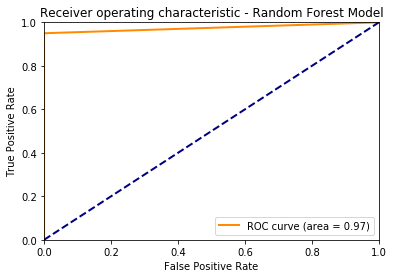

In [130]:
# Plot ROC for Random Forest
fpr, tpr, thresholds = metrics.roc_curve(Train_Y, predict_classes(probabilities))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest Model')
plt.legend(loc="lower right")
plt.show()

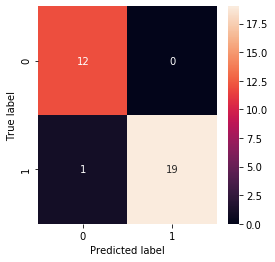

In [131]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Train_Y, predict_classes(probabilities))
class_names = sorted(Train_Y.unique())
df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
fig = plt.figure(figsize=(4,4))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Show the 18 most important features

In [132]:
# Rebuild RFC model
rfc_fit = rfc.fit(Train_X, Train_Y)

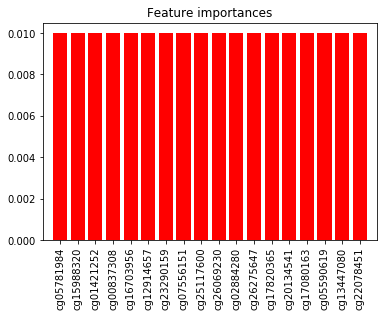

The 18 most important features are: 

Index(['cg05781984', 'cg15988320', 'cg01421252', 'cg00837308', 'cg16703956',
       'cg12914657', 'cg23290159', 'cg07556151', 'cg25117600', 'cg26069230',
       'cg02884280', 'cg26275647', 'cg17820365', 'cg20134541', 'cg17080163',
       'cg05590619', 'cg13447080', 'cg22078451'],
      dtype='object')


In [133]:
# Create function to determine the feature importance 
importances = rfc_fit.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(18),importances[indices][:18],color="r", align="center")
plt.xticks(range(18),Train_X.T.index[indices][:18],rotation = 90)
plt.xlim([-1, 18])
plt.show()
print('The 18 most important features are: \n')
print(Train_X.T.index[indices][:18])

## Get the test data accuracy and AUC

In [134]:
# Determine performance on test set
test_prob = rfc_fit.predict_proba(Test_X)

In [135]:
# Metrics for test set
print('Cross validation accuracy:')
print(metrics.accuracy_score(Test_Y, predict_classes(test_prob)))
print('\nCross validation classification report\n')
print(metrics.classification_report(Test_Y, predict_classes(test_prob)))
tn, fp, fn, tp = metrics.confusion_matrix(Test_Y, predict_classes(test_prob)).ravel()
print('\nSensitivity: ',tp / (tp+fn))
print('\nSpecificity: ',tn / (tn+fp))

Cross validation accuracy:
1.0

Cross validation classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


Sensitivity:  1.0

Specificity:  1.0


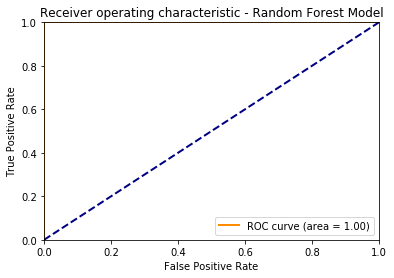

In [136]:
# Plot ROC for Random Forest
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predict_classes(test_prob))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest Model')
plt.legend(loc="lower right")
plt.show()

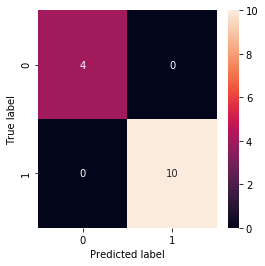

In [137]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Test_Y, predict_classes(test_prob))
class_names = sorted(Test_Y.unique())
df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
fig = plt.figure(figsize=(4,4))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Get testing accuracy again using feature selection of "r" features

In [138]:
# takes a while
maxtrain = 0
maxtest = 0
maxr = 0
for r in range(1, 50, 1):
    Train_X_select = np.take(Train_X, indices[:r], 1)
    rfc_fit_select = rfc.fit(Train_X_select, Train_Y)
    probabilities_select = cross_val_predict(rfc, Train_X_select, Train_Y, cv=kfold, method='predict_proba')
    acctrain = metrics.accuracy_score(Train_Y, predict_classes(probabilities_select))
    Test_X_select = np.take(Test_X, indices[:r], 1)
    test_prob_select = rfc_fit_select.predict_proba(Test_X_select)
    acctest =  metrics.accuracy_score(Test_Y, predict_classes(test_prob_select))
    if acctrain > maxtrain:
        if acctest > maxtest:
            maxtrain = acctrain 
            maxtest = acctest
            maxr = r
print(maxr)

5


In [152]:
r = 5

In [153]:
print('The 18 most important features are: \n')
for i in range(r):
    print(Train_X.T.index[indices][i], "Importance: {:.6f}".format(importances[indices][i]))

The 18 most important features are: 

cg05781984 Importance: 0.010000
cg15988320 Importance: 0.010000
cg01421252 Importance: 0.010000
cg00837308 Importance: 0.010000
cg16703956 Importance: 0.010000


In [154]:
# Rebuild RFC model
Train_X_select = np.take(Train_X, indices[:r], 1)
rfc_fit_select = rfc.fit(Train_X_select, Train_Y)

In [155]:
#Print accuracy
probabilities_select = cross_val_predict(rfc, Train_X_select, Train_Y, cv=kfold, method='predict_proba')
print('Cross validation accuracy:')
print(metrics.accuracy_score(Train_Y, predict_classes(probabilities_select)))
print('\nCross validation classification report\n')
print(metrics.classification_report(Train_Y, predict_classes(probabilities_select)))
tn, fp, fn, tp = metrics.confusion_matrix(Train_Y, predict_classes(probabilities_select)).ravel()
print('\nSensitivity: ',tp / (tp+fn))
print('\nSpecificity: ',tn / (tn+fp))

Cross validation accuracy:
1.0

Cross validation classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        20

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Sensitivity:  1.0

Specificity:  1.0


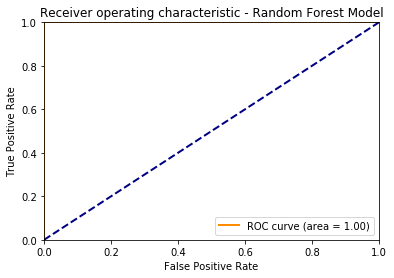

In [156]:
# Plot ROC for Random Forest
fpr, tpr, thresholds = metrics.roc_curve(Train_Y, predict_classes(probabilities_select))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest Model')
plt.legend(loc="lower right")
plt.show()

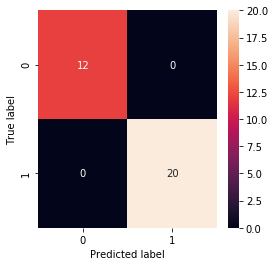

In [157]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Train_Y, predict_classes(probabilities_select))
class_names = sorted(Train_Y.unique())
df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
fig = plt.figure(figsize=(4,4))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Evaluate the feature reduced performance on the test set

In [158]:
# Determine performance on test set
Test_X_select = np.take(Test_X, indices[:r], 1)
test_prob_select = rfc_fit_select.predict_proba(Test_X_select)

In [160]:
# Metrics for test set
print('Cross validation accuracy:')
print(metrics.accuracy_score(Test_Y, predict_classes(test_prob_select)))
print('\nCross validation classification report\n')
print(metrics.classification_report(Test_Y, predict_classes(test_prob_select)))
tn, fp, fn, tp = metrics.confusion_matrix(Test_Y, predict_classes(test_prob_select)).ravel()
print('\nSensitivity: ',tp / (tp+fn))
print('\nSpecificity: ',tn / (tn+fp))

Cross validation accuracy:
1.0

Cross validation classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


Sensitivity:  1.0

Specificity:  1.0


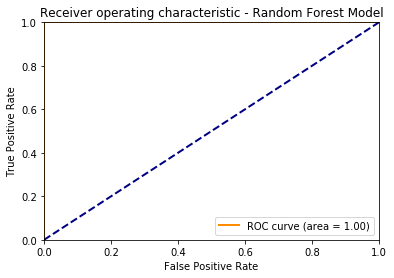

In [161]:
# Plot ROC for Random Forest
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predict_classes(test_prob_select))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest Model')
plt.legend(loc="lower right")
plt.show()

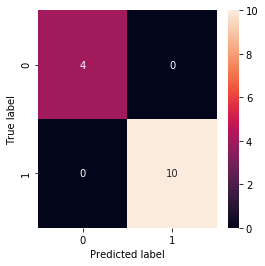

In [162]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(Test_Y, predict_classes(test_prob_select))
class_names = sorted(Test_Y.unique())
df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
fig = plt.figure(figsize=(4,4))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()